In [1]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#define p, k1需要再确定
a1 = 1 - 0.029
k1 = 0.02

def P(lemda1):
    return 1 - a1*(np.e**(-k1*lemda1))

print(P(0))

0.029000000000000026


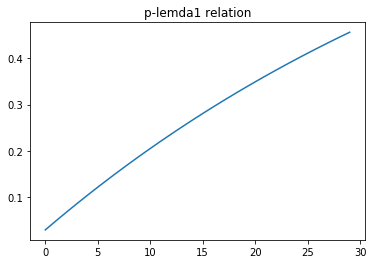

In [3]:
lemdas = np.arange(0, 30, 1)
ps = [P(i) for i in lemdas]
plt.title("p-lemda1 relation")
plt.plot(lemdas, ps)

In [5]:
#define alpha, k2需要再确定
a2 = 0.09
k2 = 0.01

def Alpha(lemda2):
    return 1 - a2*(np.e**(-k2*lemda2))

print(Alpha(0))

0.91


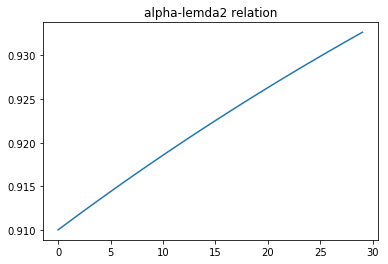

In [6]:
lemdas = np.arange(0, 30, 1)
ps = Alpha(lemdas)
plt.title("alpha-lemda2 relation")
plt.plot(lemdas, ps)

In [7]:
#define K
N = 68484
n = 21729000
c = 20
sigma = 1.22

def K(p, alpha):
    return 1 - (n*sigma*p)/(N*alpha*c)

print(K(P(0), Alpha(0)))

0.3832103720705432


In [8]:
#define t 下面这些参数是我随便写的，需要查找资料确定
T = 10
L = 80000
v = 10

def t(lemda1, lemda2):
    p = P(lemda1)
    alpha = Alpha(lemda2)
    k = K(p, alpha)
    numerator = 12*L #12*L*c
    denominator = N*alpha*T*k*v #T*v*(N*alpha*c - n*sigma*p)
    #print(denominator)
    return numerator/denominator

print(t(0, 0))

0.4019790938210418


下图可以看出，K随着lemda1的增大迅速减小，减小的速度与k1的大小有关，可以发现一个奇怪的现象，K竟然慢慢小于0了？？？这是因为如果lemda1太大，那么打车的人实在太多了，以至于就算所有的出租车上都载着人，也满足不了乘客需求

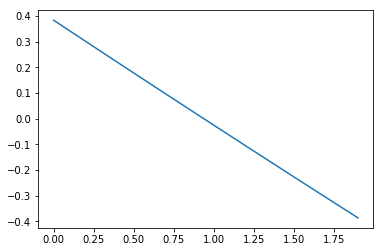

In [9]:
#绘制空驶率K关于lemda1的函数
lemda1 = np.arange(0, 2, 0.1)
k = K(P(lemda1), Alpha(0))
plt.plot(lemda1, k)

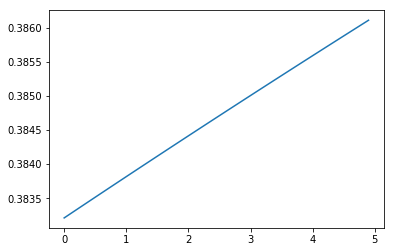

In [10]:
#绘制空驶率K关于lemda2的函数
lemda2 = np.arange(0, 5, 0.1)
k = K(P(0), Alpha(lemda2))
plt.plot(lemda2, k)

下图可以看出平均等待时间一开始确实变大了，之后变小是因为K变成负了，就没有意义了

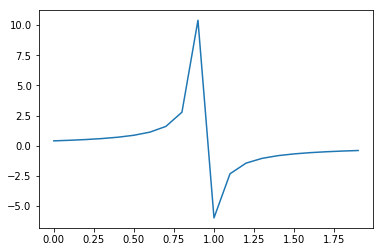

In [11]:
#绘制 t 关于lemda1的函数，假设lemda2 = 0
lemda1 = np.arange(0, 2, 0.1)
time = t(lemda1, 0)
plt.plot(lemda1, time)

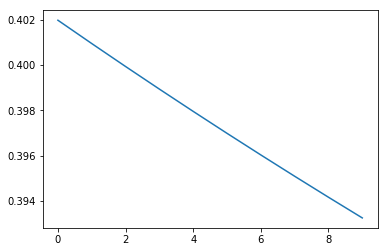

In [12]:
#绘制 t 关于lemda2的函数，假设lemda1 = 0
lemda2 = np.arange(0, 10, 1)
time = t(0, lemda2)
plt.plot(lemda2, time)

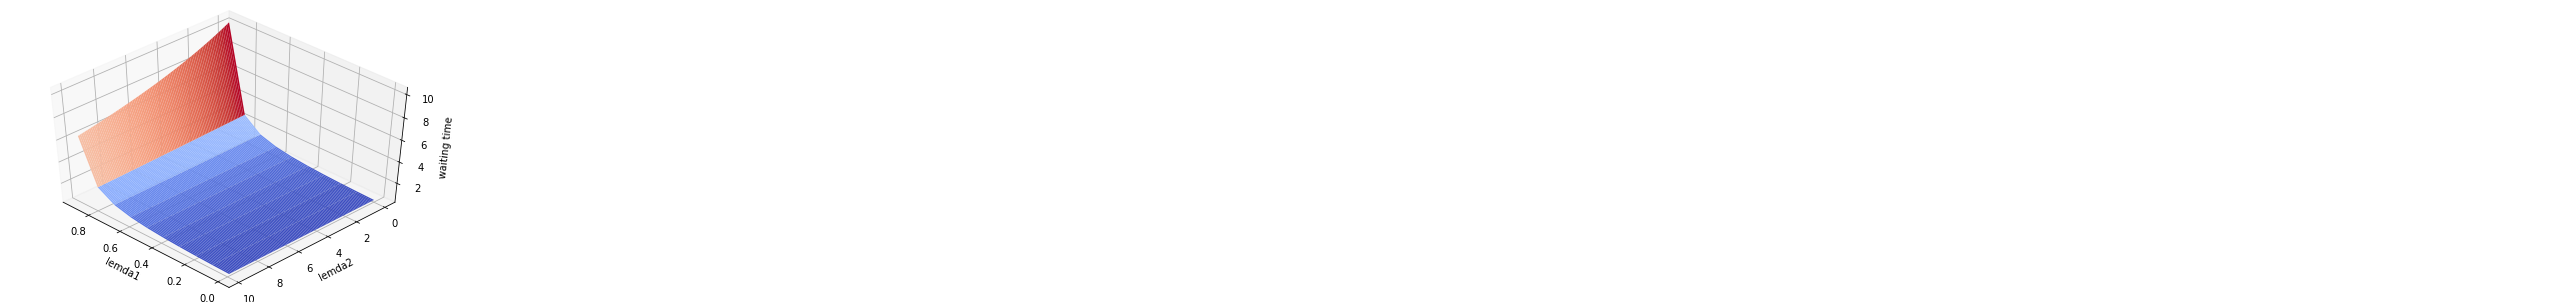

In [13]:
# t(0,0)表示的是没有补贴时候的t
# t(lemda1, lemda2)表示有补贴时候的t
lemda1 = np.arange(0, 1, 0.1) #这个取值范围里可以保证 K 非负
lemda2 = np.arange(0, 10, 0.1)
lemda1, lemda2 = np.meshgrid(lemda1, lemda2)
time = t(lemda1, lemda2)
fig = plt.figure()
ax = Axes3D(fig)
#ax.contour3D(lemda1, lemda2, time)
ax.plot_surface(lemda1, lemda2, time, rstride=1, cstride=1, cmap=plt.cm.coolwarm)

ax.set_xlabel('lemda1')
ax.set_ylabel('lemda2')
ax.set_zlabel('waiting time')

ax.view_init(45, 135) #第一个参数是仰视角度，第二个是侧视角度

plt.show()